# **Dev Halvawala-IN9240571**

## **EDA Project - Analysis of AMCAT Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import chi2_contingency

In [2]:
df = pd.read_csv(r"/content/drive/MyDrive/Innomatics-Data Science and GenAI Internship/Task-2 AMCAT/data.xlsx - Sheet1.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.3,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.4,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.0,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.6,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.0,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [4]:
df.shape

(3998, 39)

In [5]:
df.columns

Index(['Unnamed: 0', 'ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity',
       'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             3998 non-null   object 
 1   ID                     3998 non-null   int64  
 2   Salary                 3998 non-null   float64
 3   DOJ                    3998 non-null   object 
 4   DOL                    3998 non-null   object 
 5   Designation            3998 non-null   object 
 6   JobCity                3998 non-null   object 
 7   Gender                 3998 non-null   object 
 8   DOB                    3998 non-null   object 
 9   10percentage           3998 non-null   float64
 10  10board                3998 non-null   object 
 11  12graduation           3998 non-null   int64  
 12  12percentage           3998 non-null   float64
 13  12board                3998 non-null   object 
 14  CollegeID              3998 non-null   int64  
 15  Coll

In [7]:
# Remove any duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

,0
Unnamed: 0,0
ID,0
Salary,0
DOJ,0
DOL,0
Designation,0
JobCity,0
Gender,0
DOB,0
10percentage,0


In [9]:
# Assuming your DataFrame is named df
df.drop(columns=['Unnamed: 0'], inplace=True)

In [10]:
df.describe()

,ID,Salary,10percentage,12graduation,12percentage,CollegeID,CollegeTier,collegeGPA,CollegeCityID,CollegeCityTier,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
count,3.998000e+03,3.998000e+03,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,...,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000,3998.000000
mean,6.637945e+05,3.076998e+05,77.925443,2008.087544,74.466366,5156.851426,1.925713,71.486171,5156.851426,0.300400,...,90.742371,22.974737,16.478739,31.851176,2.683842,-0.037831,0.146496,0.002763,-0.169033,-0.138110
std,3.632182e+05,2.127375e+05,9.850162,1.653599,10.999933,4802.261482,0.262270,8.167338,4802.261482,0.458489,...,175.273083,98.123311,87.585634,104.852845,36.658505,1.028666,0.941782,0.951471,1.007580,1.008075
min,1.124400e+04,3.500000e+04,43.000000,1995.000000,40.000000,2.000000,1.000000,6.450000,2.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700
25%,3.342842e+05,1.800000e+05,71.680000,2007.000000,66.000000,494.000000,2.000000,66.407500,494.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.713525,-0.287100,-0.604800,-0.868200,-0.669200
50%,6.396000e+05,3.000000e+05,79.150000,2008.000000,74.400000,3879.000000,2.000000,71.720000,3879.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.234400,-0.094300
75%,9.904800e+05,3.700000e+05,85.670000,2009.000000,82.600000,8818.000000,2.000000,76.327500,8818.000000,1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400
max,1.298275e+06,4.000000e+06,97.760000,2013.000000,98.700000,18409.000000,2.000000,99.930000,18409.000000,1.000000,...,715.000000,623.000000,676.000000,548.000000,516.000000,1.995300,1.904800,2.535400,3.352500,1.822400


In [11]:
df

,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000.0,6/1/12 0:00,present,senior quality engineer,Bangalore,f,2/19/90 0:00,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000.0,9/1/13 0:00,present,assistant manager,Indore,m,10/4/89 0:00,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000.0,6/1/14 0:00,present,systems engineer,Chennai,f,8/3/92 0:00,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000.0,7/1/11 0:00,present,senior software engineer,Gurgaon,m,12/5/89 0:00,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000.0,3/1/14 0:00,3/1/15 0:00,get,Manesar,m,2/27/91 0:00,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000.0,10/1/11 0:00,10/1/12 0:00,software engineer,New Delhi,m,4/15/87 0:00,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000.0,7/1/13 0:00,7/1/13 0:00,technical writer,Hyderabad,f,8/27/92 0:00,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000.0,7/1/13 0:00,present,associate software engineer,Bangalore,m,7/3/91 0:00,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000.0,7/1/14 0:00,1/1/15 0:00,software developer,Asifabadbanglore,f,3/20/92 0:00,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


## **UNIVARIATE ANALYSIS**

In [12]:
df['Salary']

,Salary
0,420000.0
1,500000.0
2,325000.0
3,1100000.0
4,200000.0
...,...
3993,280000.0
3994,100000.0
3995,320000.0
3996,200000.0


<Axes: xlabel='Salary', ylabel='Count'>

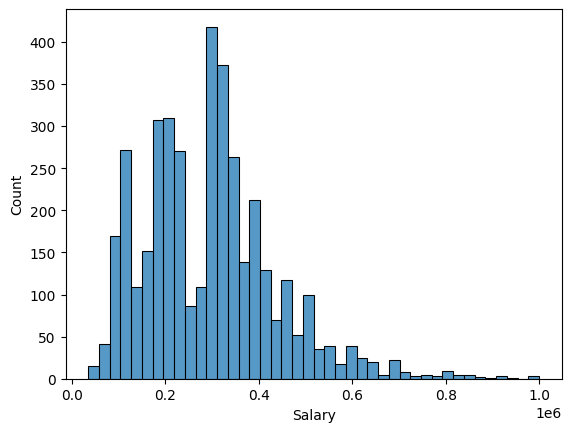

In [25]:
sns.histplot(df['Salary'])

In [16]:
# Initialize a dictionary to store the count of rows for each salary threshold
salary_counts = {250000 * i: (df['Salary'] <= 250000 * i).sum() for i in range(1, 8)}

# Print the counts for each threshold
for threshold, count in salary_counts.items():
    print(f"Number of Rows in dataframe in which Salary <= {threshold}: {count}")

Number of Rows in dataframe in which Salary <= 250000: 1710
Number of Rows in dataframe in which Salary <= 500000: 3683
Number of Rows in dataframe in which Salary <= 750000: 3929
Number of Rows in dataframe in which Salary <= 1000000: 3962
Number of Rows in dataframe in which Salary <= 1250000: 3975
Number of Rows in dataframe in which Salary <= 1500000: 3981
Number of Rows in dataframe in which Salary <= 1750000: 3982


In [17]:
indexNames = df[ df['Salary'] > 1000000 ].index
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
df.shape

(3962, 38)

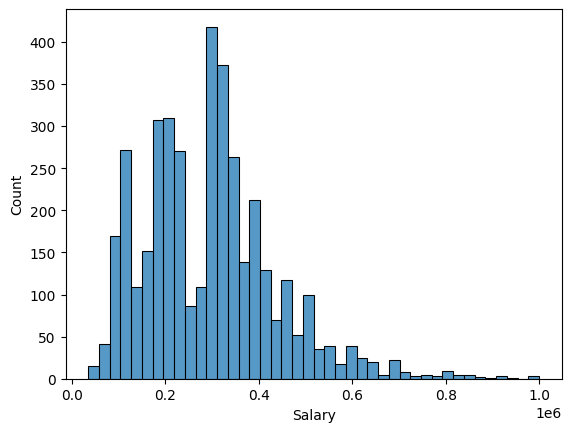

In [23]:
sns.histplot(df['Salary']);

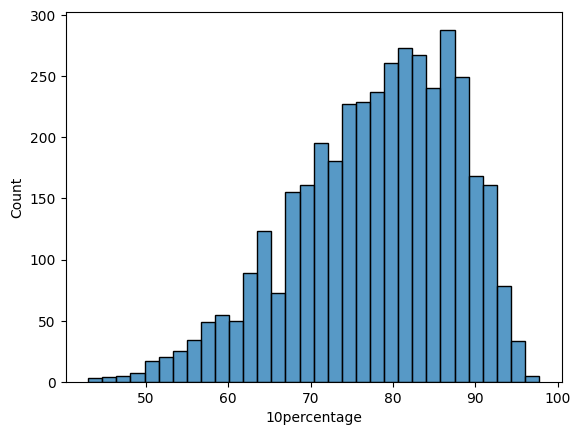

In [34]:
sns.histplot(df["10percentage"]);
#The 10percentage column is not normally distributed and outliers and the max is in range 80-90

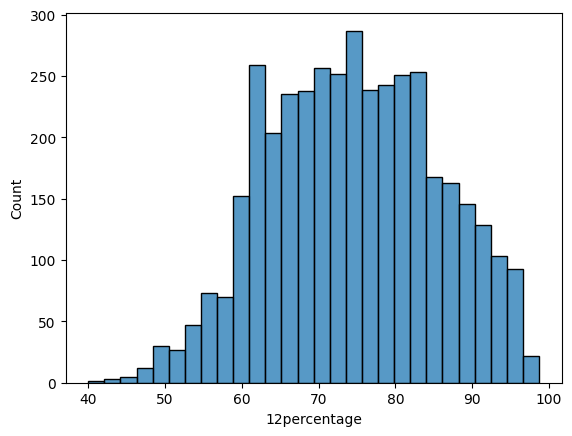

In [35]:
sns.histplot(df["12percentage"]);
#The 12percentage column is not normally distributed and outliers and the max is in range 70-80

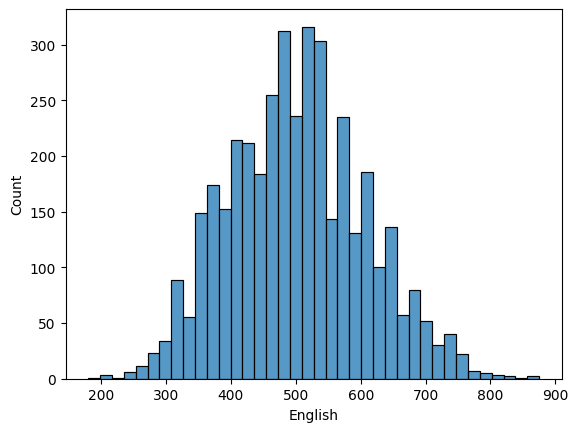

In [36]:
sns.histplot(df["English"]);
#The English column is normally distributed and has max in range 400-600

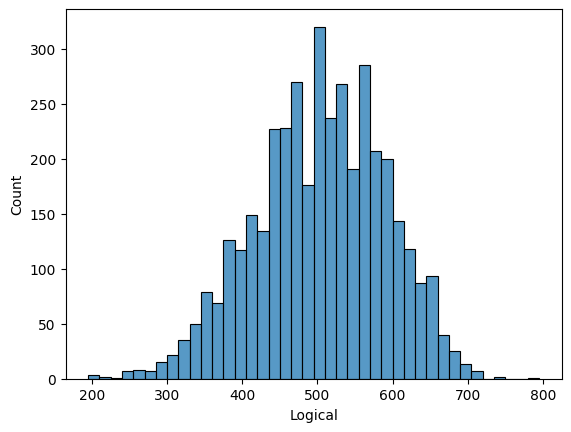

In [37]:
sns.histplot(df["Logical"]);
#The Logical column is normally distributed and has max in range 400-700

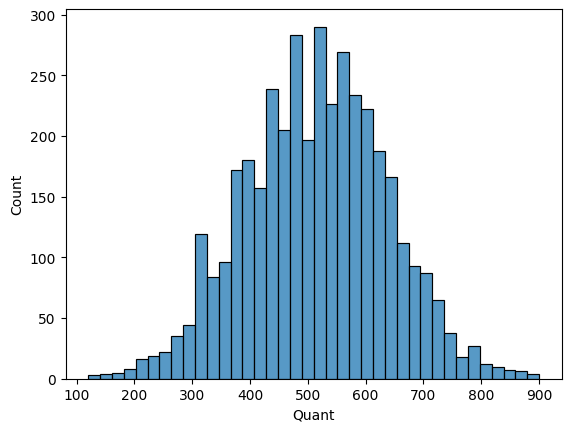

In [38]:
sns.histplot(df["Quant"]);
#The Quant column is normally distributed and has max in range 400-800

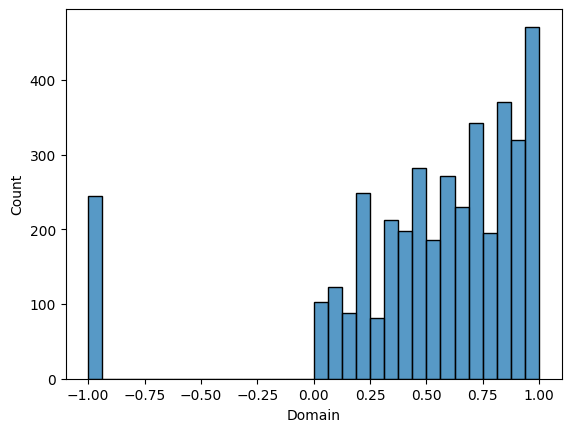

In [40]:
sns.histplot(df["Domain"]);
#The collegecityid column is not normally distributed and has outliers

<Axes: xlabel='Gender', ylabel='count'>

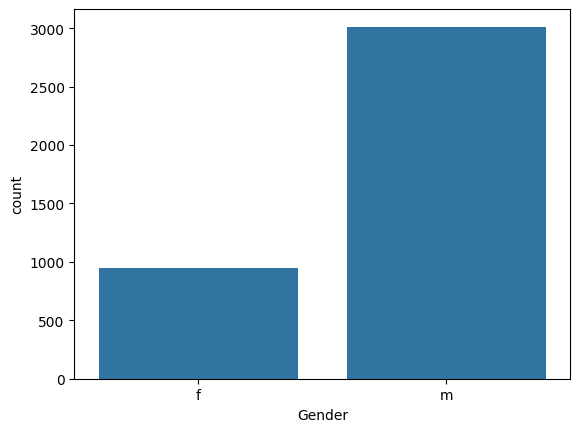

In [42]:
sns.countplot(x='Gender',data=df)
#From below graph the count of males are more compared to females

<Axes: xlabel='CollegeTier', ylabel='count'>

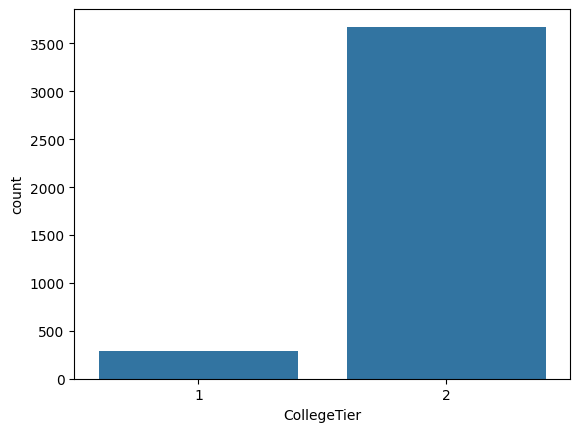

In [44]:
sns.countplot(x='CollegeTier',data=df)
#The count of tier 2 college is more!!

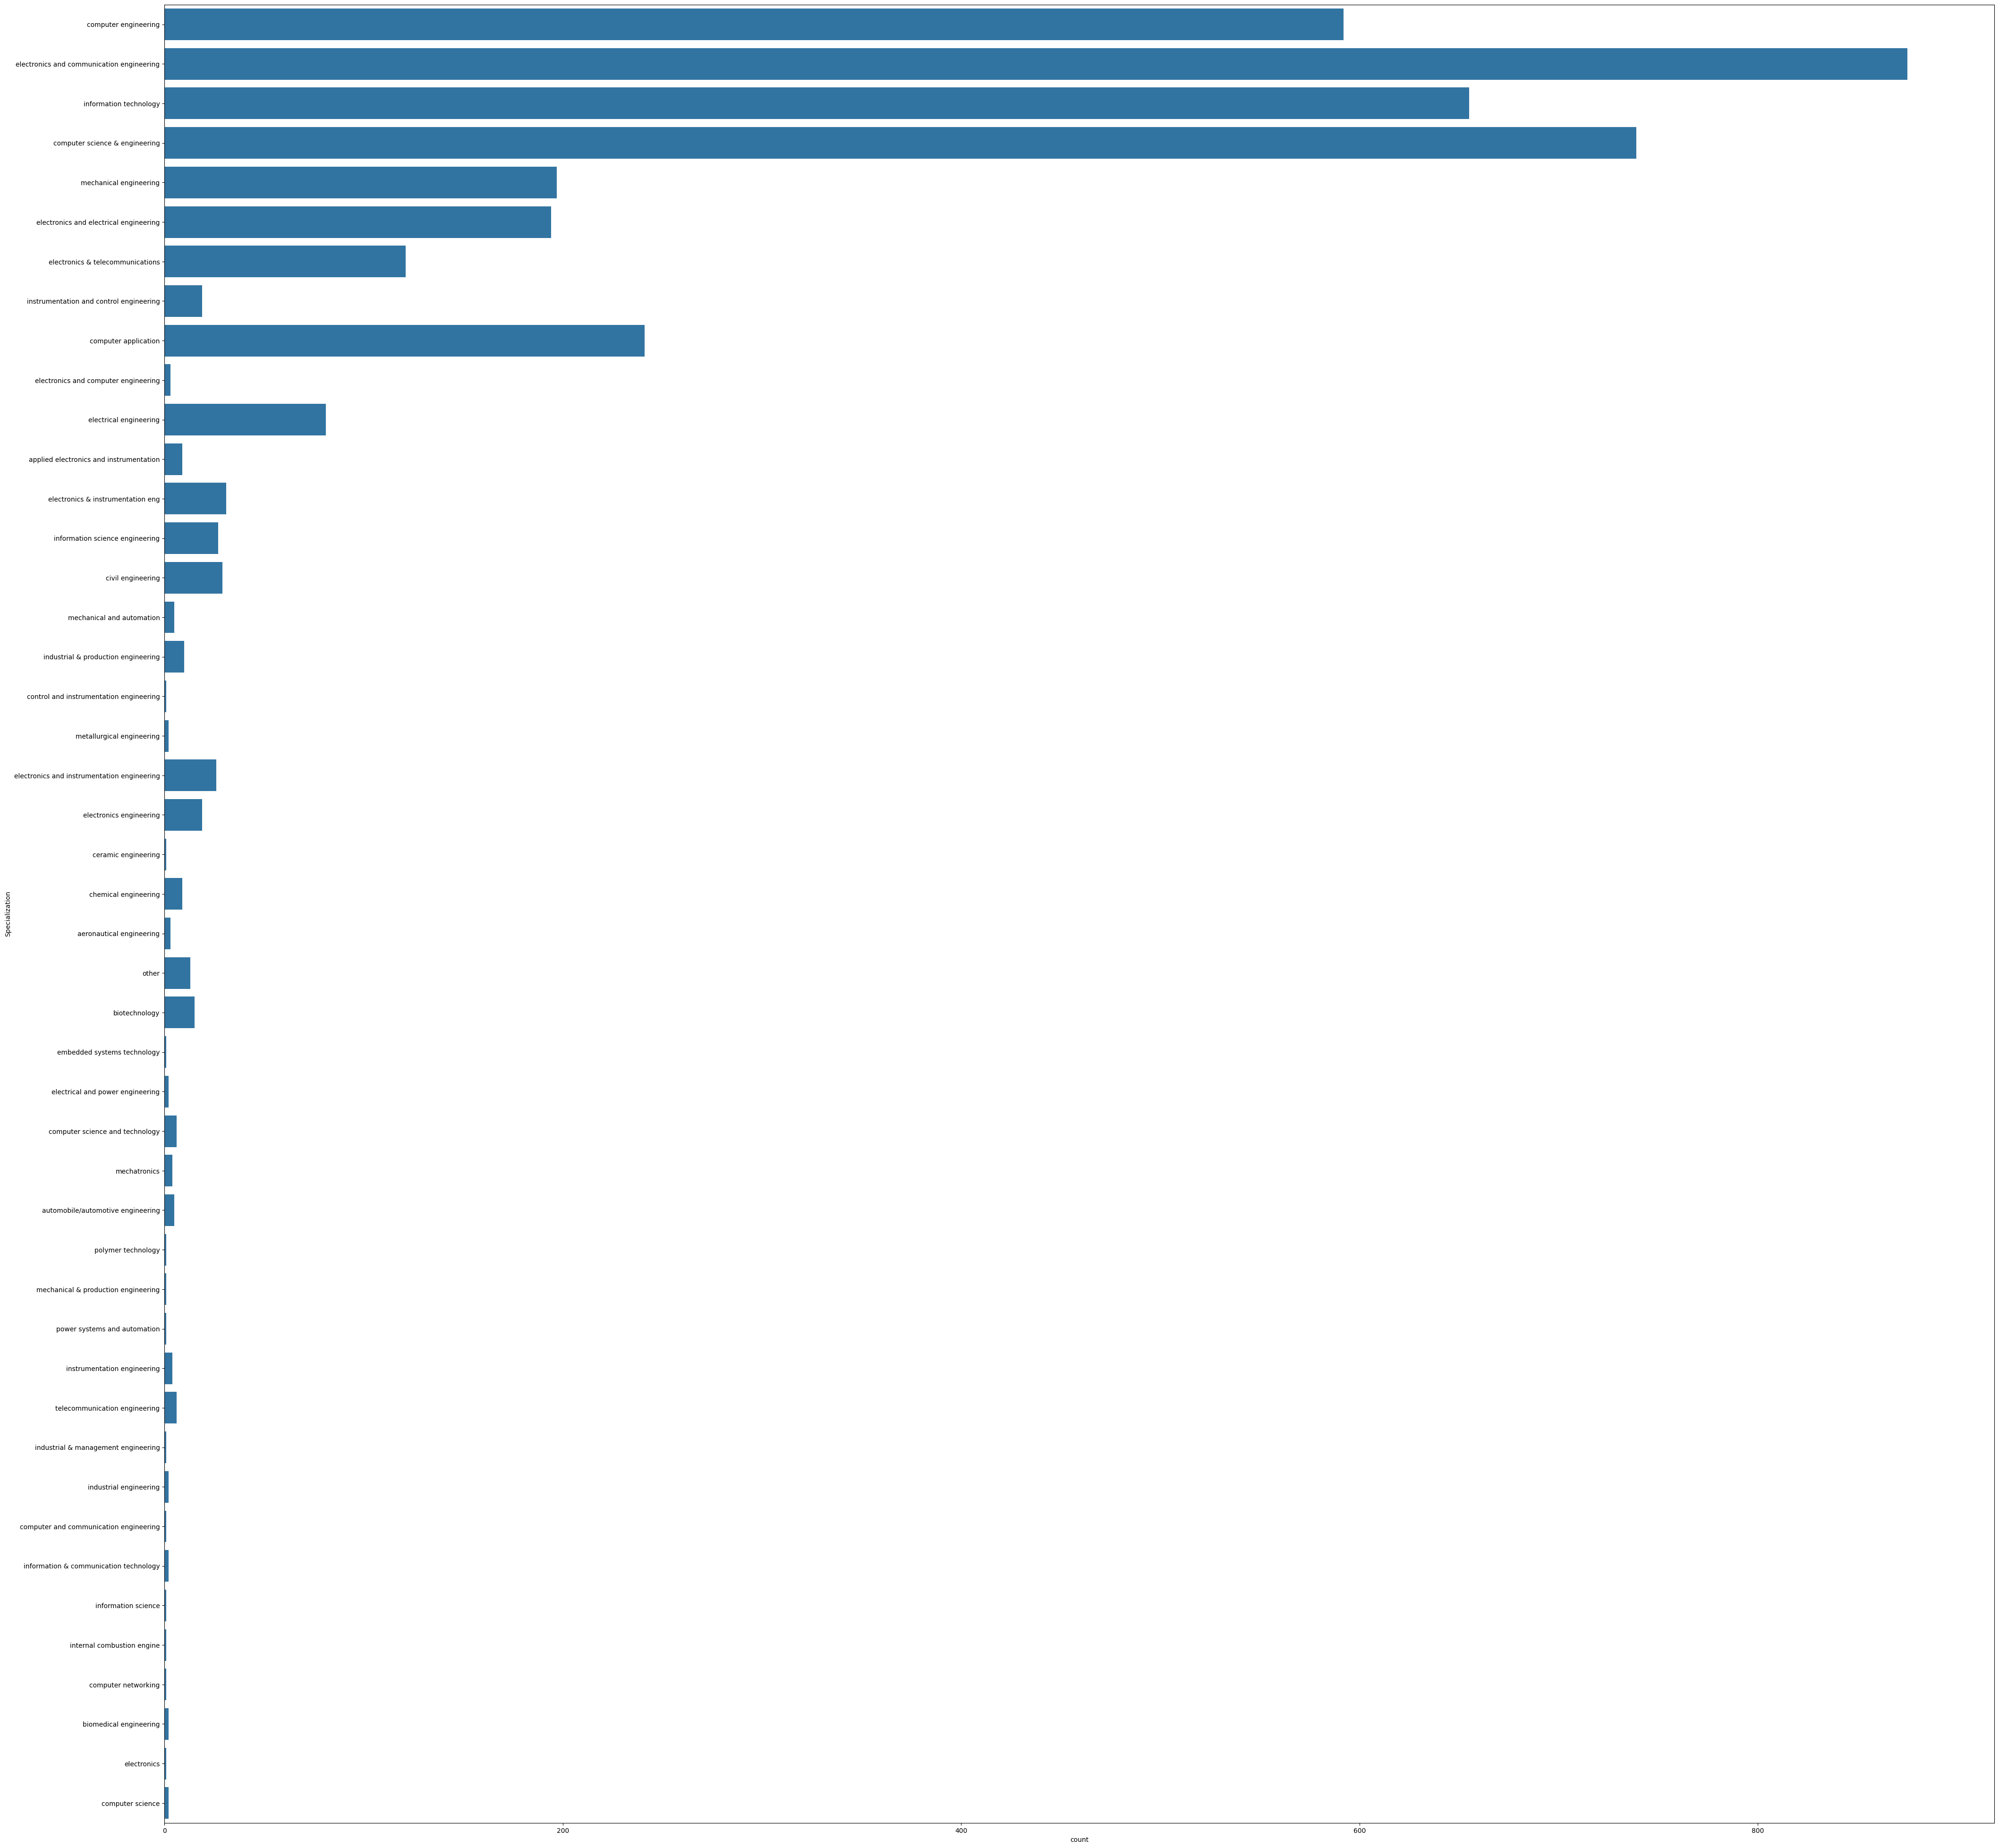

In [45]:
plt.figure(figsize=(50, 50))
ax = sns.countplot(y="Specialization", data=df)

<Axes: xlabel='CollegeCityTier', ylabel='count'>

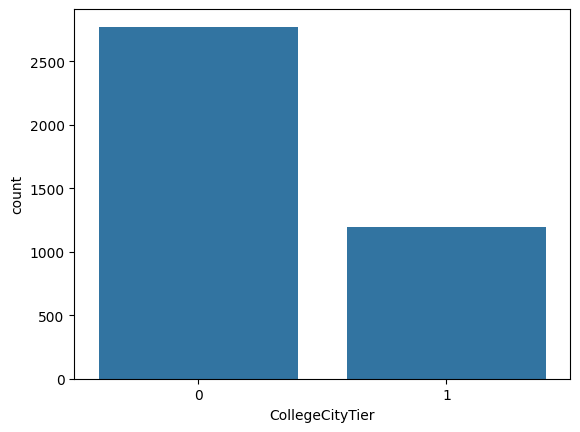

In [46]:
sns.countplot(x='CollegeCityTier',data=df)
#The Collegecitytier 0 has high frequency to that of collegecitytier 1

<Axes: xlabel='Specialization'>

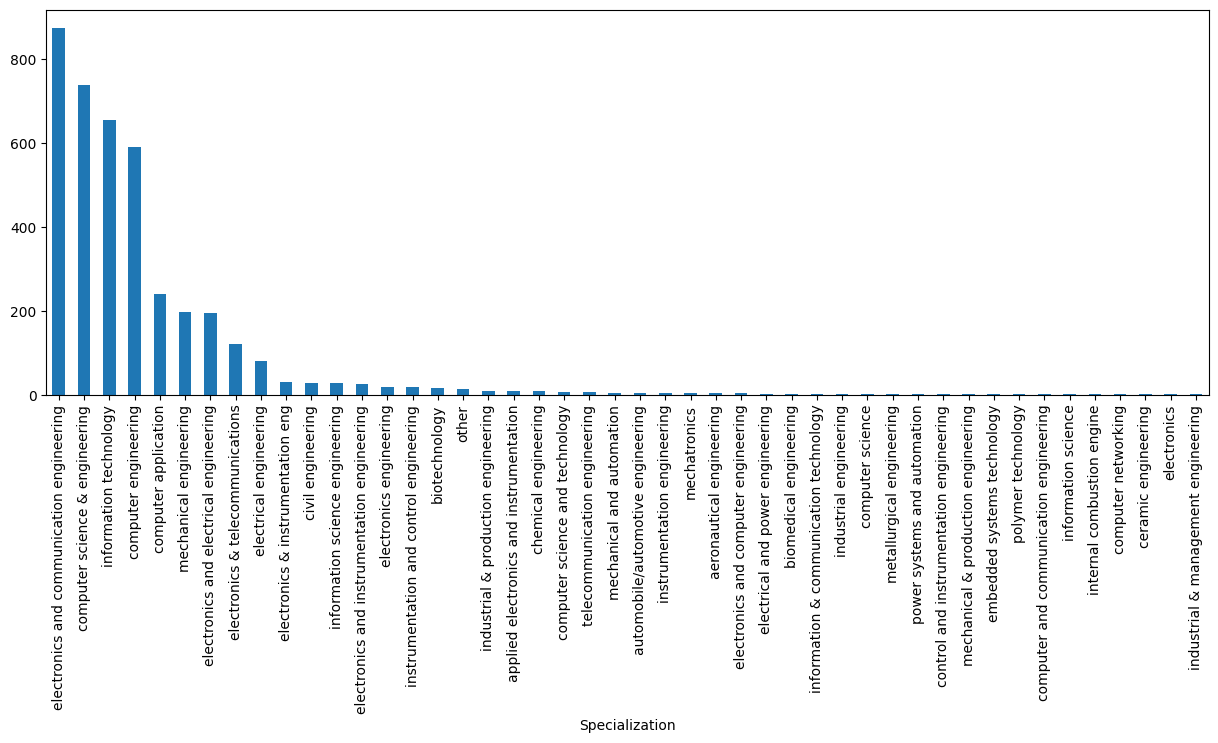

In [47]:
specialization_freq = df['Specialization'].value_counts()
specialization_freq.plot(kind='bar', figsize=(15,5))

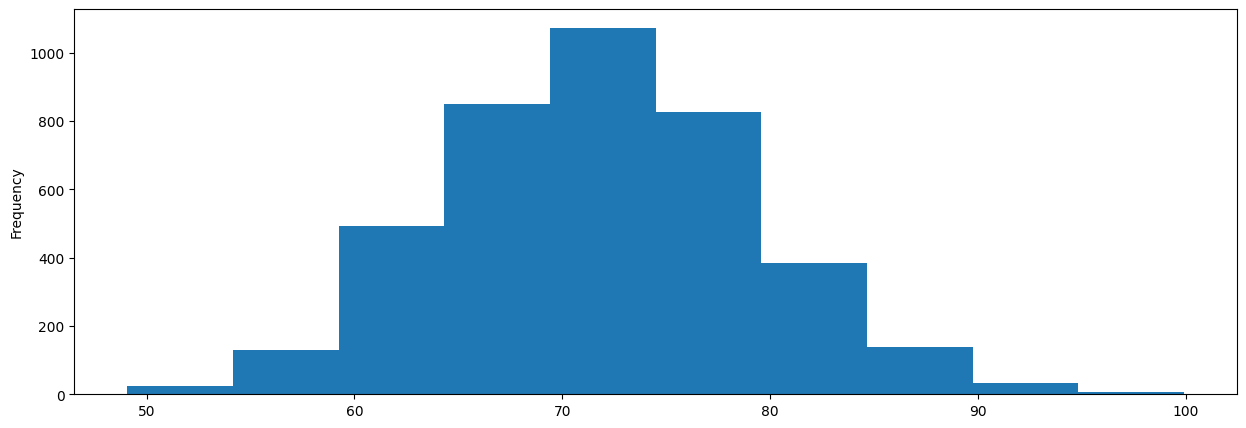

In [49]:
df.loc[df['collegeGPA'] <= 10, 'collegeGPA'] *= 10
df['collegeGPA'].plot(kind='hist', figsize=(15,5));
#Bringing the CGPA to a 0-100 scale

<Axes: xlabel='CollegeCityTier', ylabel='Salary'>

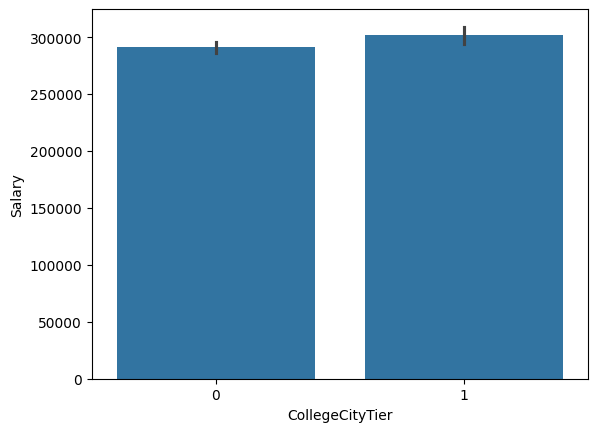

In [50]:
sns.barplot(x='CollegeCityTier',y='Salary',data=df)

## **BIVARIATE ANALYSIS**

<Axes: xlabel='CollegeCityTier', ylabel='Salary'>

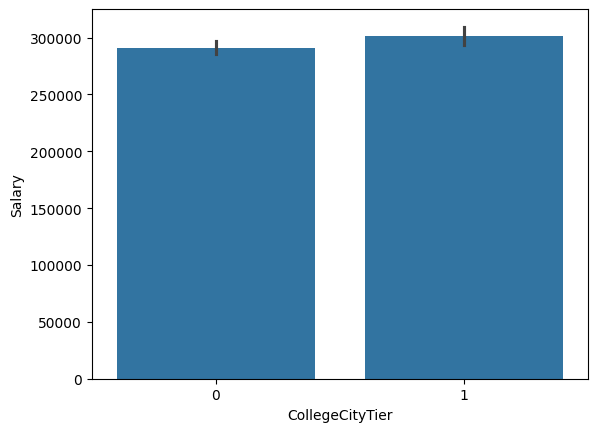

In [51]:
sns.barplot(x='CollegeCityTier',y='Salary',data=df)

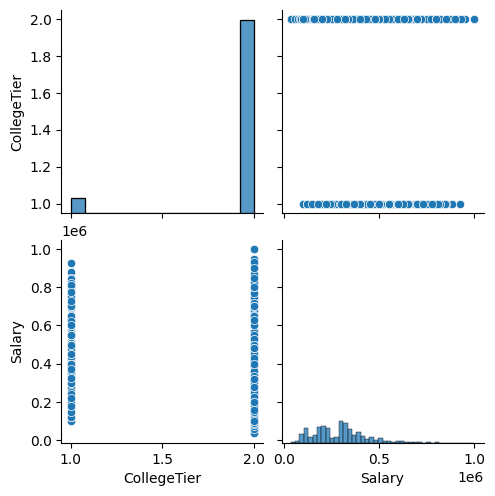

In [52]:
sns.pairplot(df,vars=['CollegeTier', 'Salary'])
#From the graph we observe that collegecitytier 1 has bagged with highest salary ,
#and also to be noted that collegecity tier 0 also provide the same salary expectations

<Axes: xlabel='Gender', ylabel='Salary'>

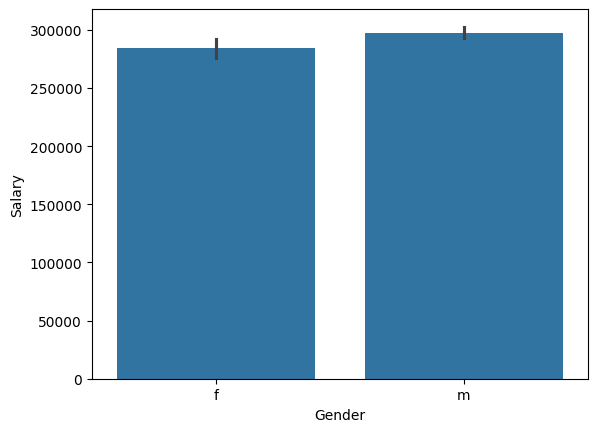

In [53]:
sns.barplot(x='Gender',y='Salary',data=df)

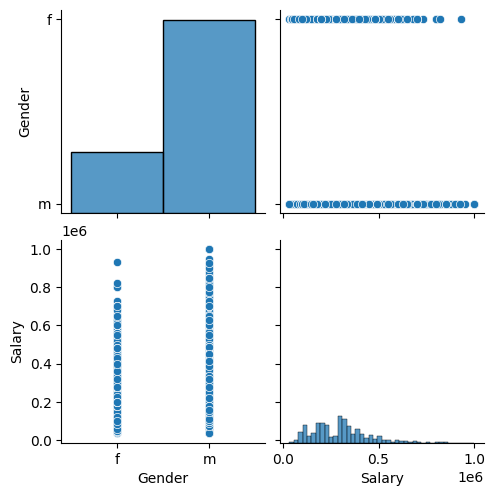

In [54]:
sns.pairplot(df,vars=['Gender', 'Salary'])
#Males and females take the salary more or less the same

In [55]:
l = []
for i in df['Designation']:
    if 'senior' in i and 'engineer' not in i:
        l.append('senior')
    elif 'trainee' in i and 'engineer' not in i:
        l.append('trainee')
    elif 'engineer' in i and 'senior' not in i:
        l.append('engineer')
    elif 'associate' in i and 'senior' not in i:
        l.append('associate')
    elif 'developer' in i and 'senior' not in i:
        l.append('developer')
    elif 'manager' in i and 'senior' not in i:
        l.append('manager')
    elif 'analyst' in i:
        l.append('analyst')
    elif 'consultant' in i:
        l.append('consultant')
    elif 'executive' in i:
        l.append('executive')
    elif 'designer' in i:
        l.append('designer')
    else:
        l.append('others')

In [56]:
df['Designations']=l
df['Designations'].value_counts()

,count
Designations,
engineer,1984
developer,663
others,528
analyst,401
manager,119
associate,65
executive,62
trainee,57
senior,41


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'others'),
  Text(1, 0, 'manager'),
  Text(2, 0, 'engineer'),
  Text(3, 0, 'senior'),
  Text(4, 0, 'analyst'),
  Text(5, 0, 'associate'),
  Text(6, 0, 'developer'),
  Text(7, 0, 'executive'),
  Text(8, 0, 'trainee'),
  Text(9, 0, 'consultant'),
  Text(10, 0, 'designer')])

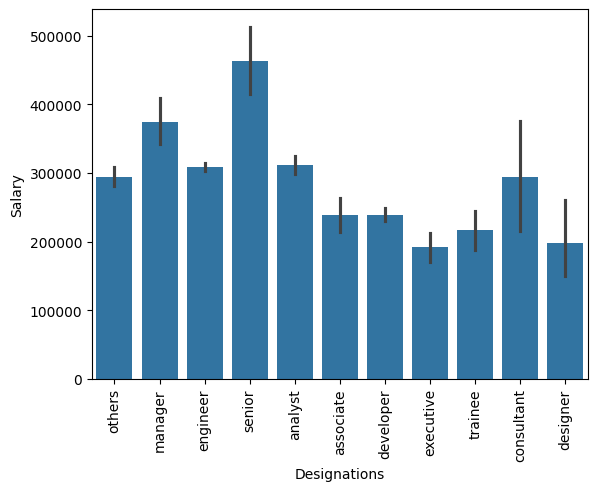

In [57]:
sns.barplot(x='Designations',y='Salary',data=df)
plt.xticks(rotation=90)

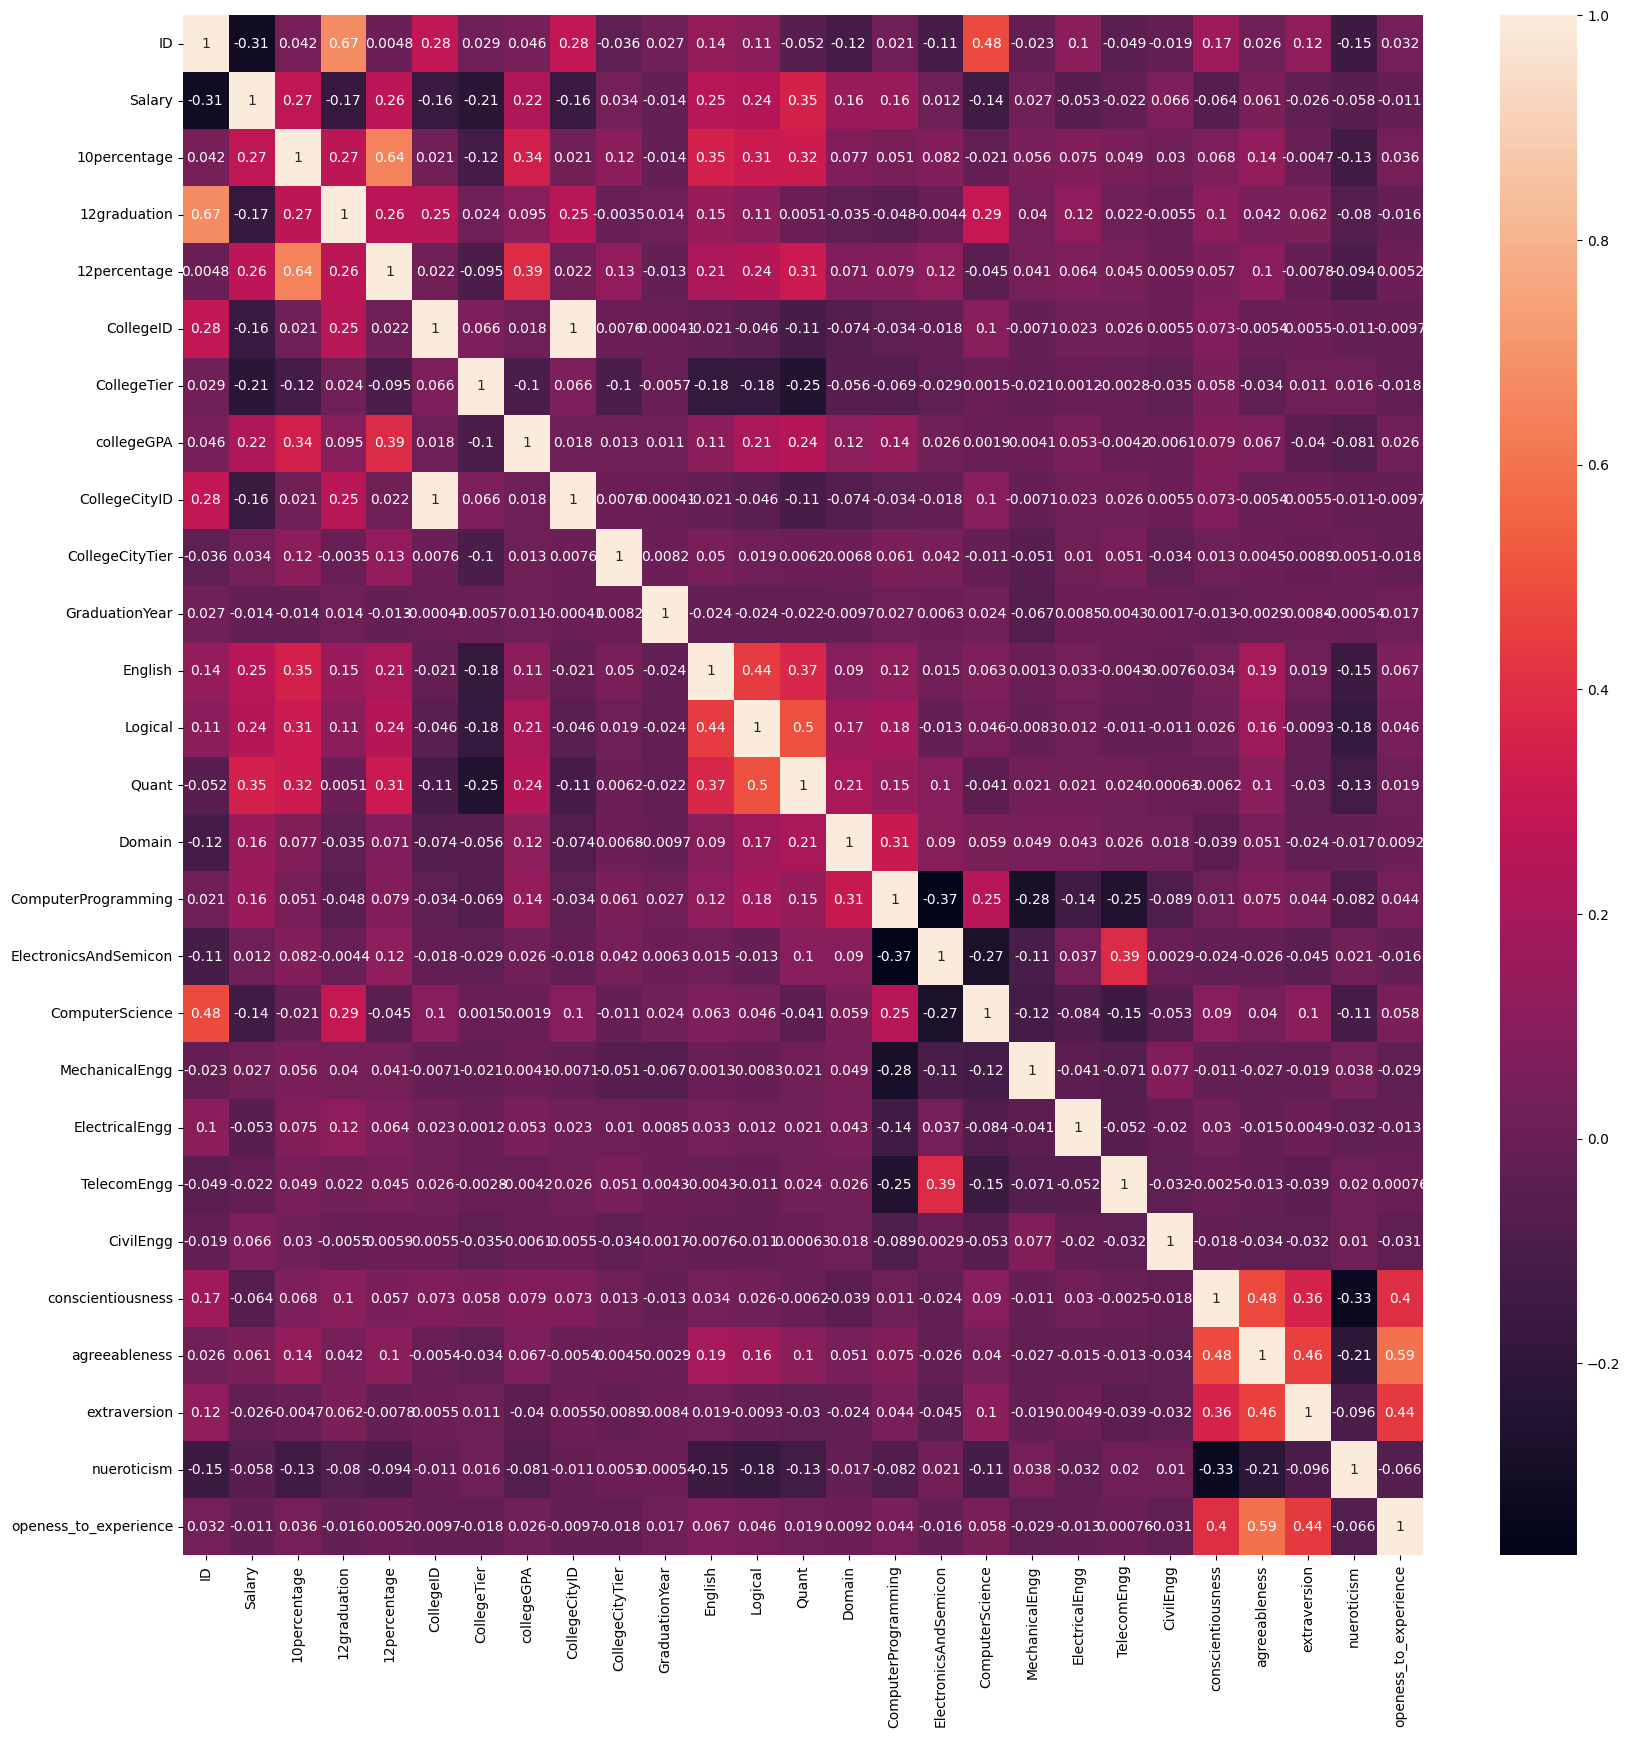

In [68]:
# Convert the date/time column to datetime objects
df['DOJ'] = pd.to_datetime(df['DOJ'])

# Extract numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns

# Calculate the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Generate the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True)
plt.show()